### Descargar los Datasets
El primer paso que debemos realizar es la descarga de datos. Para ellos, iremos al link: https://www.kaggle.com/c/titanic/data y procederemos a la descarga.

Los archivos estan el la carpeta data.

### Librerias a utilizar
Importamos las bibliotecas que vamos a utilizar. Las principales son:
- numpy (la biblioteca principal para computación científica con Python), y
- scikit-learn (que nos permitirá entrenar y aplicar el modelo elegido).

In [2]:
## Librerías que Vamos a Utilizar

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import IPython
import sklearn as sk
import numpy as np
# import pydot
# import pyparsing

print('IPython version:', IPython.__version__)
print('numpy version:', np.__version__)
print('scikit-learn version:', sk.__version__)
# print('pydot version:', pydot.__version__)
# print('pyparsing version:', pyparsing.__version__)

IPython version: 6.4.0
numpy version: 1.14.3
scikit-learn version: 0.19.1


### Preprocesamiento e Ingenieria de Atributos

#### Lista de Atributos:
<table align="left">
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

#### Algunas Notas:
***
__pclass__: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

__sibsp__: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

__parch__: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [8]:
df = pd.read_csv("data/train.csv")

In [23]:
#Un registro de los datos
df.iloc[11]

PassengerId                          12
Survived                              1
Pclass                                1
Name           Bonnell, Miss. Elizabeth
Sex                              female
Age                                  58
SibSp                                 0
Parch                                 0
Ticket                           113783
Fare                              26.55
Cabin                              C103
Embarked                              S
Name: 11, dtype: object

In [16]:
#Los nombres de las columnas o atributos
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
# En la columna 2 tenemos la clase que queremos predecir (es decir, si sobrevivió o no)
# Vale 1 si sobrevivió, 0 si no.
titanic_y = df.iloc[:,1].astype(float)
titanic_y[11]

1.0

Aquí es donde tenemos que elegir las features que vamos a usar para aprender. En este caso, elegimos la clase, la edad, y el sexo. El destino no parece influenciar mucho, dónde embarcó tampoco... de acuerdo a nuestro conocimiento... aunque nada nos impide agregarlo luego como feature. El nombre no puede ir, ya que es imposible que sirva para generalizar. Por supuesto, no podemos usar para predecir la clase que estamos tratando de adivinar, así que la columna "survived" también desaparece.

In [37]:
# Elegimos las columnas que tiene la clase, la edad, y el sexo
titanic_x = df.iloc[:, [2, 5, 4]]
titanic_x.head(10)

,Pclass,Age,Sex
0,3,22.0,male
1,1,38.0,female
2,3,26.0,female
3,1,35.0,female
4,3,35.0,male
5,3,NaN,male
6,1,54.0,male
7,3,2.0,male
8,3,27.0,female
9,2,14.0,female


In [40]:
# Mostremos el % de missing por variable
titanic_x.isnull().sum() / len(titanic_x)

Pclass    0.000000
Age       0.198653
Sex       0.000000
dtype: float64

Tenemos algunos problemas con la edad: en algunos casos no tiene valores:

In [38]:
titanic_x.iloc[5]

Pclass       3
Age        NaN
Sex       male
Name: 5, dtype: object

Tenemos que hacer algo: elegimos poner el valor medio...

In [42]:
mean_age = np.mean(titanic_x.Age)
print('Manera 1 : {}'.format(mean_age))
print('Manera 2 : {}'.format(titanic_x.Age.mean()))

Manera 1 : 29.69911764705882
Manera 2 : 29.69911764705882


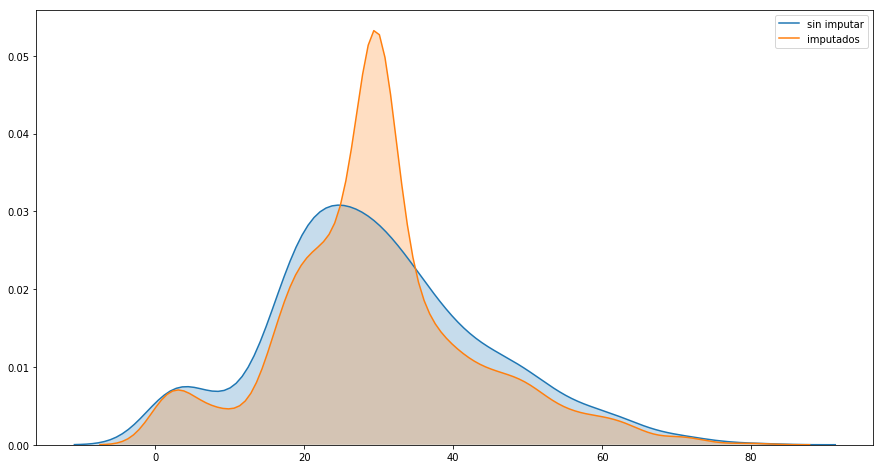

In [43]:
# Veamos como es la distribución de la variable Age con la imputación
plt.figure(figsize=(15,8)) #definir el tamaño de la imagen
sns.kdeplot(titanic_x.Age.dropna(), shade=True, legend=True, label = 'sin imputar')
sns.kdeplot(titanic_x.Age.fillna(titanic_x.Age.mean()), shade=True, legend=True, label = 'imputados')

In [47]:
# Actualizamos las edades con valor nulo
titanic_x.Age.fillna(mean_age, inplace=True)

/home/paultabo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [48]:
# Mostremos el % de missing por variable
titanic_x.isnull().sum() / len(titanic_x)

Pclass    0.0
Age       0.0
Sex       0.0
dtype: float64

In [50]:
titanic_x.iloc[5]

Pclass          3
Age       29.6991
Sex          male
Name: 5, dtype: object

Bien. Veamos ahora la clase y el sexo: el clasificador que vamos a usar espera atributos que son números reales y hoy los tenemos como categorías. Empecemos por sexo: solamente hay dos categorías, por lo que podemos decir (por ejemplo) que femenino es 0 y masculino es 1. scikit-learn nos provee de una clase LabelEncoder que hace esto...:

In [51]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
# Le paso los valores que tengo y el asigna un entero a cada clase posible
label_encoder = enc.fit(titanic_x.iloc[:, 2])
print("Categorical classes:", label_encoder.classes_)

Categorical classes: ['female' 'male']


In [54]:
# Veamos como las transforma...
integer_classes = label_encoder.transform(label_encoder.classes_)
print("Integer classes:", list(zip(label_encoder.classes_,integer_classes)))

Integer classes: [('female', 0), ('male', 1)]


In [73]:
t = label_encoder.transform(list(titanic_x['Sex']))
t
# titanic_x['Age'] = t
# list(zip(titanic_x.iloc[10:20], titanic_y.iloc[10:20]))

[1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
